## TEMA 3 INTERPOLACIÓN

METODO DE LAS DIFERENCIAS DIVIDIDAS

Tabla de Diferencias Divididas:
      0           1           2             3            4            5   \
0   30.0 -148.000000  490.000000 -9.666667e+02  1354.166667 -1326.058201   
1   15.2  -50.000000  103.333333 -1.541667e+02   160.714286  -110.691392   
2   10.2  -19.000000   26.250000 -2.559524e+01    16.815476    -8.405785   
3    6.4   -8.500000    8.333333 -5.416667e+00     2.525641    -0.750279   
4    4.7   -4.333333    2.916667 -1.628205e+00     0.649944    -0.203013   
5    3.4   -2.000000    0.800000 -1.333333e-01    -0.020000     0.018810   
6    2.4   -1.200000    0.533333 -1.933333e-01     0.055238     0.000000   
7    1.8   -0.400000    0.050000 -9.251859e-17     0.000000     0.000000   
8    1.4   -0.300000    0.050000  0.000000e+00     0.000000     0.000000   
9    1.1   -0.200000    0.000000  0.000000e+00     0.000000     0.000000   
10   0.9    0.000000    0.000000  0.000000e+00     0.000000     0.000000   

            6           7           8          9       

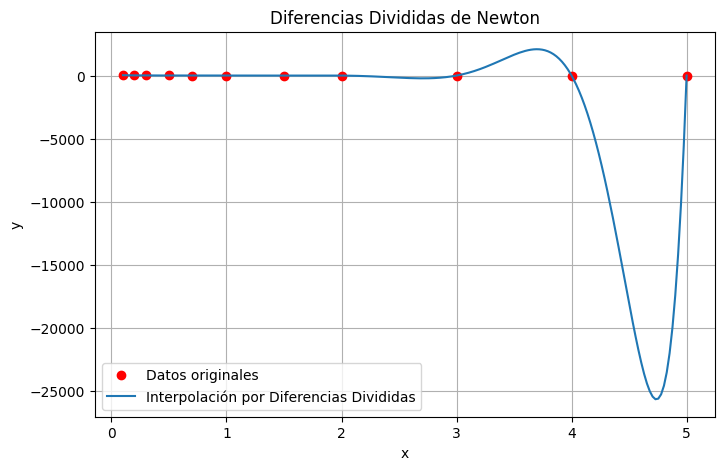

In [23]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify
import matplotlib.pyplot as plt

def diferencias_divididas(x, y):
    """Calcula la tabla de diferencias divididas de Newton."""
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna es y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    
    return coef

def construir_polinomio_simplificado(coef, x):
    """Construye y simplifica el polinomio de interpolación de Newton."""
    x_sym = symbols('x')  # Definir la variable simbólica
    n = len(coef[0])
    polinomio = coef[0, 0]
    terminos = 1
    polinomio_expr = polinomio  # Polinomio inicial

    for i in range(1, n):
        terminos *= (x_sym - x[i-1])
        polinomio_expr += coef[0, i] * terminos

    return simplify(polinomio_expr)

def construir_polinomio(coef, x):
    """Construye el polinomio de interpolación de Newton en formato simbólico."""
    n = len(coef[0])
    polinomio = f"{coef[0,0]}"
    terminos = ""
    
    for i in range(1, n):
        terminos += f"(x - {x[i-1]})"
        if coef[0, i] != 0:
            polinomio += f" + ({coef[0, i]}) * {terminos}"
    
    return polinomio


# Datos de ejemplo
x = [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0]
y = [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]

# Calcular la tabla de diferencias divididas
tabla_coef = diferencias_divididas(x, y)
tabla_df = pd.DataFrame(tabla_coef).fillna('')

# Calcular el polinomio simplificado
polinomio_simplificado = construir_polinomio_simplificado(tabla_coef, x)

# Mostrar la tabla y el polinomio simplificado
print("Tabla de Diferencias Divididas:")
print(tabla_df)
print("\nPolinomio de Interpolación de Newton (Simplificado):")
print(polinomio_simplificado)

# Construir el polinomio en formato simbólico
polinomio = construir_polinomio(tabla_coef, x)
print("\nPolinomio de Interpolación de Newton:")
print(polinomio)


# Construir el polinomio con las diferencias divididas
def construir_polinomio_simplificado(coef, x):
    x_sym = symbols('x')
    pol = coef[0, 0]
    for i in range(1, coef.shape[1]):
        t = coef[0, i]
        for j in range(i):
            t *= (x_sym - x[j])
        pol += t
    return simplify(pol)

# Calcular polinomio simbólico
polinomio_simplificado = construir_polinomio_simplificado(tabla_coef, x)

# Evaluar
x_sym = symbols('x')
f_dd = lambdify(x_sym, polinomio_simplificado, 'numpy')
x_vals = np.linspace(min(x), max(x), 200)
y_vals = f_dd(x_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ro', label="Datos originales")
plt.plot(x_vals, y_vals, label="Interpolación por Diferencias Divididas")
plt.title("Diferencias Divididas de Newton")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.legend()
plt.show()


NEWTON PERO DESGLOSA EL NUMERADOR Y EL DENOMINADOR DE CADA UNA DE LA TABLA

Tabla de Diferencias Divididas:
      0           1           2             3            4            5   \
0   30.0 -148.000000  490.000000 -9.666667e+02  1354.166667 -1326.058201   
1   15.2  -50.000000  103.333333 -1.541667e+02   160.714286  -110.691392   
2   10.2  -19.000000   26.250000 -2.559524e+01    16.815476    -8.405785   
3    6.4   -8.500000    8.333333 -5.416667e+00     2.525641    -0.750279   
4    4.7   -4.333333    2.916667 -1.628205e+00     0.649944    -0.203013   
5    3.4   -2.000000    0.800000 -1.333333e-01    -0.020000     0.018810   
6    2.4   -1.200000    0.533333 -1.933333e-01     0.055238     0.000000   
7    1.8   -0.400000    0.050000 -9.251859e-17     0.000000     0.000000   
8    1.4   -0.300000    0.050000  0.000000e+00     0.000000     0.000000   
9    1.1   -0.200000    0.000000  0.000000e+00     0.000000     0.000000   
10   0.9    0.000000    0.000000  0.000000e+00     0.000000     0.000000   

            6           7           8          9       

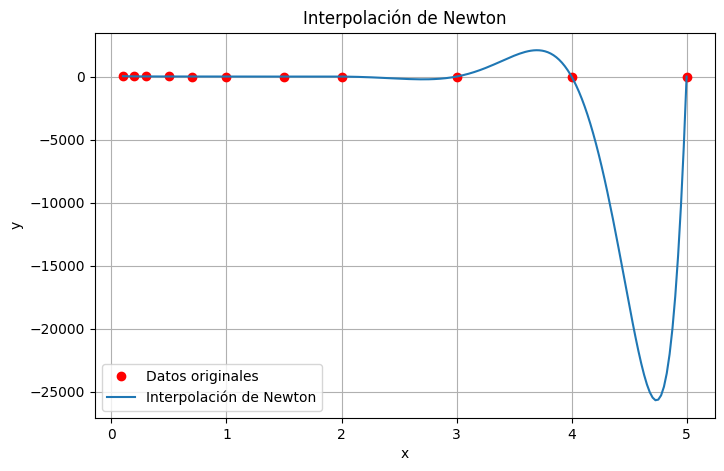

In [24]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify
import matplotlib.pyplot as plt

def diferencias_divididas_con_denominadores(x, y):
    """Calcula la tabla de diferencias divididas de Newton e incluye los denominadores."""
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna es y
    denominadores = []  # Lista para almacenar los denominadores usados en cada paso

    for j in range(1, n):
        for i in range(n - j):
            denominador = x[i + j] - x[i]
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / denominador
            denominadores.append({
                "Orden Δ^k": j,
                "Índice i": i,
                "xi": x[i],
                "xi+j": x[i + j],
                "Denominador (xi+j - xi)": denominador,
                "Resultado de Diferencia Dividida": coef[i][j]
            })

    return coef, pd.DataFrame(denominadores)

# Datos de entrada
x = [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0]
y = [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]

# Calcular diferencias divididas con denominadores
tabla_coef, df_denominadores = diferencias_divididas_con_denominadores(x, y)

# Mostrar los cálculos detallados de los denominadores
print("Tabla de Diferencias Divididas:")
print(pd.DataFrame(tabla_coef).fillna(''))  # Mostrar la tabla completa

print("\nDenominadores en Diferencias Divididas:")
print(df_denominadores)  # Mostrar denominadores paso a paso

# Crear función numérica a partir del polinomio simbólico
x_sym = symbols('x')
f_newton = lambdify(x_sym, polinomio_simplificado, 'numpy')

# Evaluar el polinomio
x_vals = np.linspace(min(x), max(x), 200)
y_vals = f_newton(x_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ro', label="Datos originales")
plt.plot(x_vals, y_vals, label="Interpolación de Newton")
plt.title("Interpolación de Newton")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.legend()
plt.show()



HERMITE

Tabla de Diferencias Divididas para Hermite:
      0           1           2             3             4             5   \
0   30.0 -148.000000  490.000000 -2.842171e-13 -14166.665000  54722.213889   
1   15.2  -99.000000  490.000000 -2.833333e+03   7722.220556 -21412.028704   
2   15.2  -50.000000  206.666700 -5.166668e+02   1298.611944  -1961.807639   
3   10.2  -29.333330   51.666650 -1.270833e+02    317.708125  -1223.957813   
4   10.2  -19.000000   26.250000  6.217249e-14   -171.875000    402.281746   
5    6.4  -13.750000   26.250000 -6.875000e+01    109.722222   -173.148148   
6    6.4   -8.500000   12.500000 -1.388889e+01     23.148148    -25.115741   
7    4.7   -6.000000    5.555556 -2.314815e+00     -1.967593      3.252520   
8    4.7   -4.333333    4.861111 -3.888889e+00      2.260684     -0.805370   
9    3.4   -2.875000    1.750000 -9.500000e-01      0.408333     -0.142778   
10   3.4   -2.000000    0.800000 -1.333333e-01     -0.020000      0.018810   
11   2.4   -1.20000

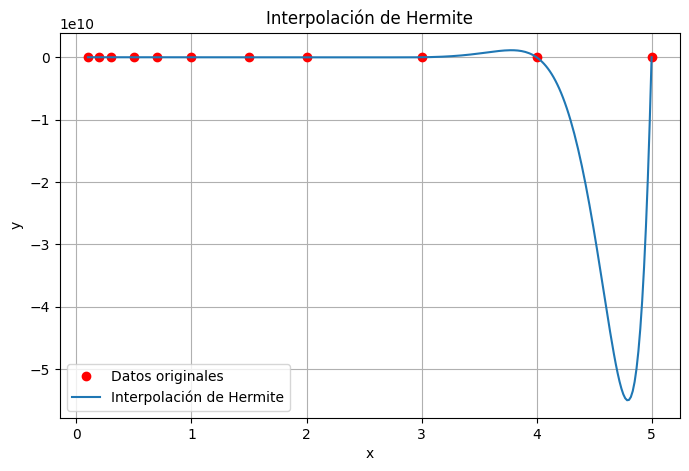

In [29]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify
import matplotlib.pyplot as plt 

def diferencias_divididas_hermite(data_points, derivatives_info):
    """Calcula la tabla de diferencias divididas para interpolación de Hermite."""
    n = len(data_points)
    z = []
    Q = []
    
    for i, (xi, yi) in enumerate(data_points):
        z.append(xi)
        Q.append([yi])
        
        if xi in derivatives_info:
            z.append(xi)
            Q.append([yi])
            Q[-1].append(derivatives_info[xi])  # Primera derivada en puntos repetidos
            Q[-2].append((Q[-2][0] - Q[-3][0]) / (z[-2] - z[-3]) if len(Q) > 2 else derivatives_info[xi])
    
    # Inicializar la tabla de diferencias divididas con ceros
    m = len(z)
    for row in Q:
        while len(row) < m:
            row.append(0)
    
    # Calcular las diferencias divididas correctamente
    for j in range(1, m):
        for i in range(m - j):
            if j == 1 and z[i] == z[i + 1]:
                Q[i][j] = Q[i + 1][1]  # Usar la derivada cuando hay repetición del mismo x
            else:
                Q[i][j] = (Q[i + 1][j - 1] - Q[i][j - 1]) / (z[i + j] - z[i])
    
    return z, np.array(Q)

def construir_polinomio_simplificado_hermite(coef, x):
    """Construye y simplifica el polinomio de interpolación de Hermite."""
    x_sym = symbols('x')
    n = len(coef[0])
    polinomio = coef[0, 0]
    terminos = 1
    polinomio_expr = polinomio
    
    for i in range(1, n):
        terminos *= (x_sym - x[i - 1])
        polinomio_expr += coef[0, i] * terminos
    
    return simplify(polinomio_expr)

# Datos de ejemplo
data_points = [(0.1,30), (0.2, 15.2), (0.3, 10.2), (0.5,6.4), (0.7,4.7), (1.0,3.4), (1.5,2.4), (2.0,1.8), (3.0,1.4), (4.0,1.1), (5.0,0.9)]
derivatives_info = {0.2: -99.00000,0.3: -29.33333,0.5: -13.75000,0.7: -6.00000,1.0: -2.87500}  # Derivadas en algunos puntos

# Calcular la tabla de diferencias divididas para Hermite
z, tabla_coef_hermite = diferencias_divididas_hermite(data_points, derivatives_info)
tabla_df_hermite = pd.DataFrame(tabla_coef_hermite).fillna('')

# Calcular el polinomio simplificado
polinomio_simplificado_hermite = construir_polinomio_simplificado_hermite(tabla_coef_hermite, z)

# Mostrar la tabla y el polinomio simplificado
print("Tabla de Diferencias Divididas para Hermite:")
print(tabla_df_hermite)
print("\nPolinomio de Interpolación de Hermite (Simplificado):")
print(polinomio_simplificado_hermite)



# Crear función numérica
x_sym = symbols('x')
f_hermite = lambdify(x_sym, polinomio_simplificado_hermite, 'numpy')

# Evaluar
x_vals = np.linspace(min(z), max(z), 300)
y_vals = f_hermite(x_vals)

# Quitar duplicados en z para los puntos
z_unique = list(dict.fromkeys(z))
y_unique = [next(y for x_, y in data_points if x_ == val) for val in z_unique]

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(z_unique, y_unique, 'ro', label="Datos originales")
plt.plot(x_vals, y_vals, label="Interpolación de Hermite")
plt.title("Interpolación de Hermite")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.legend()
plt.show()



MÉTODO DE LAGRANGE

Términos de Lagrange:
L_0(x) * y_0 = 27.7777777777778*(0.204081632653061*x - 1.02040816326531)*(0.256410256410256*x - 1.02564102564103)*(0.344827586206897*x - 1.03448275862069)*(0.526315789473684*x - 1.05263157894737)*(0.714285714285714*x - 1.07142857142857)*(x - 1)*(1.66666666666667*x - 1.16666666666667)*(2.5*x - 1.25)*(5.0*x - 1.5)*(10.0*x - 2.0)
L_1(x) * y_1 = -87.1625734564332*x**10 + 1577.64257956144*x**9 - 11746.0283989889*x**8 + 46968.9473081743*x**7 - 110771.820334423*x**6 + 159650.739324105*x**5 - 141086.462197773*x**4 + 74609.8772307483*x**3 - 22198.2809295206*x**2 + 3247.28525540614*x - 164.737263832659
L_2(x) * y_2 = 11.8571428571429*(0.212765957446809*x - 1.06382978723404)*(0.27027027027027*x - 1.08108108108108)*(0.37037037037037*x - 1.11111111111111)*(0.588235294117647*x - 1.17647058823529)*(0.833333333333333*x - 1.25)*(x - 1)*(2.5*x - 1.75)*(5.0*x - 2.5)*(5.0*x - 0.5)*(10.0*x - 2.0)
L_3(x) * y_3 = -36.68430335097*x**10 + 652.980599647267*x**9 - 4749.8835978836*x**8 + 183

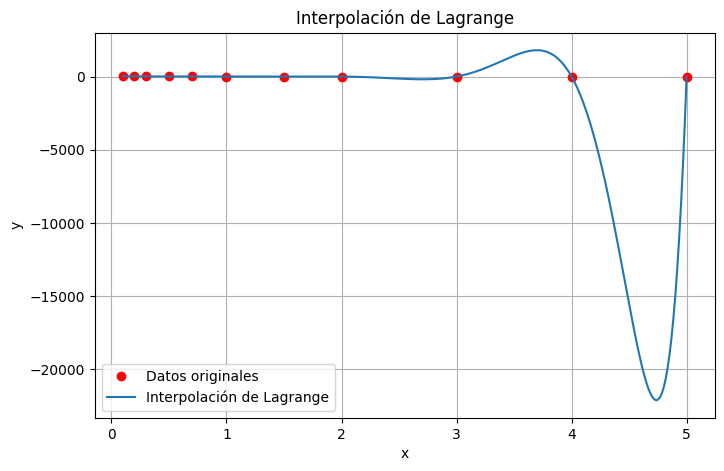

In [13]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify, prod
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y):
    """
    Construye el polinomio de interpolación de Lagrange.

    Parameters:
    - x: lista de puntos x.
    - y: lista de valores f(x) en los puntos x.

    Returns:
    - polinomio_simplificado: polinomio de Lagrange simplificado.
    - terminos: lista de términos individuales L_i(x) * y_i.
    """
    x_sym = symbols('x')  # Definir la variable simbólica
    n = len(x)
    polinomio = 0  # Polinomio inicial
    terminos = []  # Lista para almacenar cada término L_i(x) * y_i

    for i in range(n):
        # Construir L_i(x)
        L_i = prod((x_sym - x[j]) / (x[i] - x[j]) for j in range(n) if j != i)
        termino = y[i] * L_i  # Término y_i * L_i(x)
        terminos.append(termino)
        polinomio += termino  # Sumar al polinomio

    return simplify(polinomio), terminos

# Datos de ejemplo
x = [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0]
y = [25.0,12.5,8.3,5.2,3.9,2.8,2.0,2.5,1.1,0.85,0.65]

# Construir el polinomio de Lagrange
polinomio_simplificado, terminos = lagrange_interpolation(x, y)

# Mostrar resultados
print("Términos de Lagrange:")
for i, termino in enumerate(terminos):
    print(f"L_{i}(x) * y_{i} =", simplify(termino))

print("\nPolinomio de Interpolación de Lagrange (Simplificado):")
print(polinomio_simplificado)


# Crear función numérica
x_sym = symbols('x')
f_lagrange = lambdify(x_sym, polinomio_simplificado, 'numpy')

# Evaluar
x_vals = np.linspace(min(x), max(x), 300)
y_vals = f_lagrange(x_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ro', label="Datos originales")
plt.plot(x_vals, y_vals, label="Interpolación de Lagrange")
plt.title("Interpolación de Lagrange")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.legend()
plt.show()



SPLINE CUBICOS

Intervalo 1 [0.1, 0.2]:
S_0(x) = 25.0*(x - 0.1)^3 + -145.5815551729686*(x - 0.1)^2 + -5.684341886080801e-13*(x - 0.1) + 2058.1555172968647

Intervalo 2 [0.2, 0.3]:
S_1(x) = 12.5*(x - 0.2)^3 + -83.83688965406276*(x - 0.2)^2 + 617.4466551890582*(x - 0.2) + -1990.7775864843056

Intervalo 3 [0.3, 0.5]:
S_2(x) = 8.3*(x - 0.3)^3 + -20.070886210780287*(x - 0.3)^2 + 20.21337924376662*(x - 0.3) + 13.205259050674023

Intervalo 4 [0.5, 0.7]:
S_3(x) = 5.2*(x - 0.5)^3 + -10.400903427192755*(x - 0.5)^2 + 28.13653467417104*(x - 0.5) + -43.16008769103636

Intervalo 5 [0.7, 1.0]:
S_4(x) = 3.9*(x - 0.7)^3 + -4.325500080448704*(x - 0.7)^2 + 2.2404820595492385*(x - 0.7) + -0.14790226758593952

Intervalo 6 [1.0, 1.5]:
S_5(x) = 2.8*(x - 1.0)^3 + -3.021144456967364*(x - 1.0)^2 + 2.107370018721894*(x - 1.0) + 1.4698377904256699

Intervalo 7 [1.5, 2.0]:
S_6(x) = 2.0*(x - 1.5)^3 + 0.18860390457378198*(x - 1.5)^2 + 4.312126704360398*(x - 1.5) + -5.378669027015923

Intervalo 8 [2.0, 3.0]:
S_7(x) = 2.5*(x - 2.0)^3

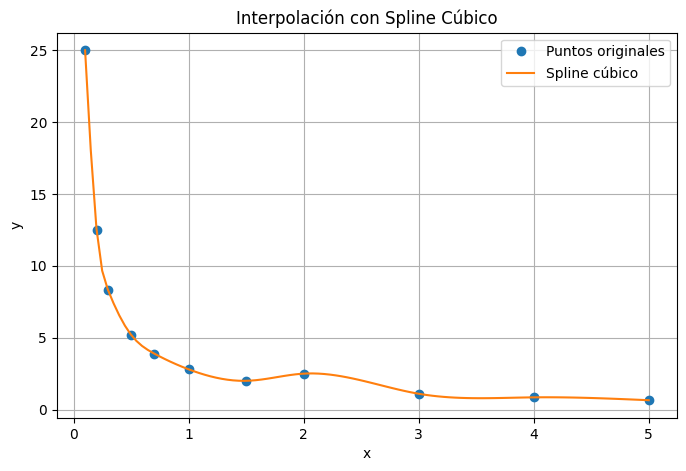

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Datos de ejemplo (puedes usar tus propios puntos)
x = np.array([0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0])
y = np.array([25.0,12.5,8.3,5.2,3.9,2.8,2.0,2.5,1.1,0.85,0.65])

# Crear el spline cúbico
cs = CubicSpline(x, y, bc_type='natural')

# Crear un rango de valores para graficar
x_fine = np.linspace(x.min(), x.max(), 100)
y_fine = cs(x_fine)

# Mostrar los parámetros del spline cúbico
for i in range(len(x) - 1):
    print(f"Intervalo {i + 1} [{x[i]}, {x[i + 1]}]:")
    print(f"S_{i}(x) = {cs.c[3, i]}*(x - {x[i]})^3 + {cs.c[2, i]}*(x - {x[i]})^2 + {cs.c[1, i]}*(x - {x[i]}) + {cs.c[0, i]}")
    print()

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Puntos originales')
plt.plot(x_fine, y_fine, label='Spline cúbico')
plt.legend()
plt.title('Interpolación con Spline Cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



SPLINES CON MATRICES

Tramo 1:
S_0(x) = -0.5000(x - 0)^3 + 0.0000(x - 0)^2 + 1.5000(x - 0) + 0.0000

Tramo 2:
S_1(x) = 0.5000(x - 1)^3 + -1.5000(x - 1)^2 + 0.0000(x - 1) + 1.0000

Tramo 3:
S_2(x) = 0.5000(x - 2)^3 + 0.0000(x - 2)^2 + -1.5000(x - 2) + 0.0000

Tramo 4:
S_3(x) = -0.5000(x - 3)^3 + 1.5000(x - 3)^2 + 0.0000(x - 3) + -1.0000



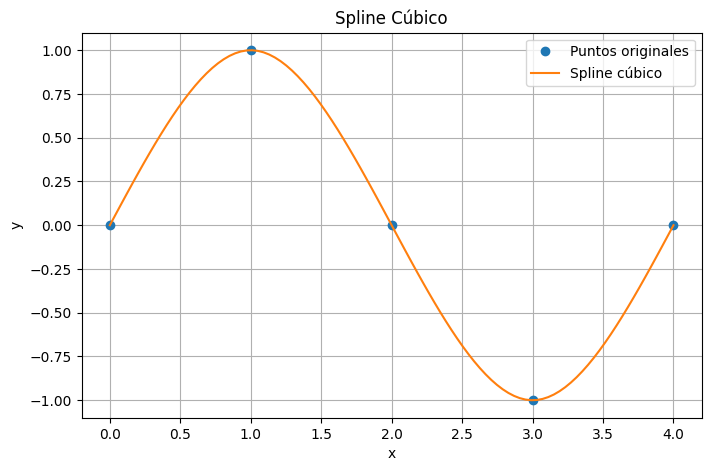

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def resolver_tridiagonal(h, u, v):
    """
    Resuelve un sistema tridiagonal dado por:
    - h: subdiagonal y superdiagonal
    - u: diagonal principal
    - v: vector del lado derecho
    """
    n = len(u)
    z = np.zeros(n)
    l = np.zeros(n)
    g = np.zeros(n)
    
    # Forward substitution
    l[0] = u[0]
    for i in range(1, n):
        g[i] = h[i-1] / l[i-1]
        l[i] = u[i] - g[i] * h[i-1]
        v[i] = v[i] - g[i] * v[i-1]
    
    # Backward substitution
    z[-1] = v[-1] / l[-1]
    for i in range(n-2, -1, -1):
        z[i] = (v[i] - h[i] * z[i+1]) / l[i]
    
    return z

def construir_splines(x, y):
    """
    Construye los splines cúbicos a partir de puntos (x, y).
    """
    n = len(x) - 1
    h = np.diff(x)  # Distancias entre nodos
    b = (y[1:] - y[:-1]) / h  # Pendientes entre nodos

    # Matriz tridiagonal y vector del lado derecho
    u = np.zeros(n-1)
    h_superior = h[:-1]
    h_inferior = h[1:]
    v = np.zeros(n-1)
    
    for i in range(1, n):
        v[i-1] = 6 * (b[i] - b[i-1])

    u = 2 * (h[:-1] + h[1:])
    
    # Resolver el sistema tridiagonal para obtener z
    z = resolver_tridiagonal(h[1:], u, v)
    
    # Extender z con valores en los bordes (condiciones naturales)
    z = np.concatenate(([0], z, [0]))

    # Construir los coeficientes A, B, C, D para cada spline
    A = (z[1:] - z[:-1]) / (6 * h)
    B = z[:-1] / 2
    C = b - h * (2 * z[:-1] + z[1:]) / 6
    D = y[:-1]

    return A, B, C, D

# Datos de ejemplo
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0, -1, 0])

# Construir los splines cúbicos
A, B, C, D = construir_splines(x, y)

# Mostrar los coeficientes para cada tramo
for i in range(len(A)):
    print(f"Tramo {i+1}:")
    print(f"S_{i}(x) = {A[i]:.4f}(x - {x[i]})^3 + {B[i]:.4f}(x - {x[i]})^2 + {C[i]:.4f}(x - {x[i]}) + {D[i]:.4f}")
    print()

# Graficar los resultados
x_fine = np.linspace(x[0], x[-1], 100)
y_fine = np.zeros_like(x_fine)

for i in range(len(A)):
    mask = (x_fine >= x[i]) & (x_fine < x[i+1])
    y_fine[mask] = (A[i] * (x_fine[mask] - x[i])**3 +
                    B[i] * (x_fine[mask] - x[i])**2 +
                    C[i] * (x_fine[mask] - x[i]) +
                    D[i])

# Agregar el último intervalo
mask = x_fine >= x[-2]
y_fine[mask] = (A[-1] * (x_fine[mask] - x[-2])**3 +
                B[-1] * (x_fine[mask] - x[-2])**2 +
                C[-1] * (x_fine[mask] - x[-2]) +
                D[-1])

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label="Puntos originales")
plt.plot(x_fine, y_fine, label="Spline cúbico")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline con matrices")
plt.grid()
plt.show()


REGRESION NO LINEAL

Parámetros ajustados:
a = 42.7001, b = -92.8474, c = 2.0014, d = -14.4605
Ecuación ajustada:
y = 42.7001 * exp(--92.8474 * x / -14.4605) + 2.0014


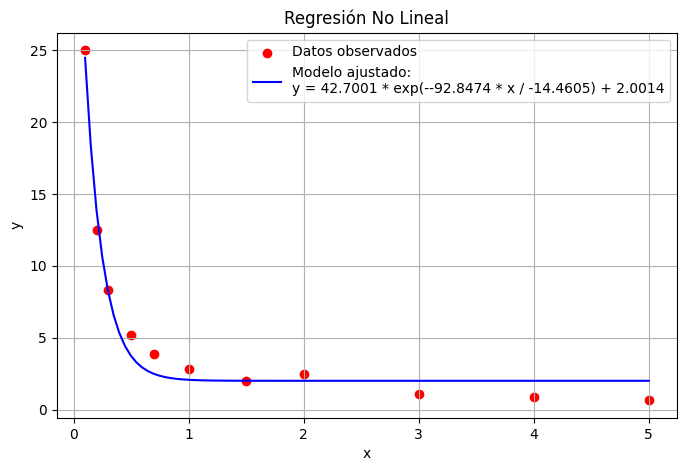

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definimos el modelo no lineal (ejemplo: una función exponencial)
def modelo(x, a, b, c, d):
    return a * np.exp(-b * x / d) + c

# Datos de ejemplo (puedes reemplazar estos valores con tus propios datos)
x_datos = np.array([0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0])
y_datos = np.array([25.0,12.5,8.3,5.2,3.9,2.8,2.0,2.5,1.1,0.85,0.65])

# Realizamos el ajuste con curve_fit
parametros_iniciales = [1, 1, 1, 1]  # Valores iniciales para a, b, c, d
parametros, covarianza = curve_fit(modelo, x_datos, y_datos, p0=parametros_iniciales)

# Extraemos los parámetros ajustados
a, b, c, d = parametros
print("Parámetros ajustados:")
print(f"a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

# Construimos la ecuación ajustada como una cadena de texto
ecuacion = f"y = {a:.4f} * exp(-{b:.4f} * x / {d:.4f}) + {c:.4f}"
print("Ecuación ajustada:")
print(ecuacion)

# Predicciones con el modelo ajustado
x_fine = np.linspace(min(x_datos), max(x_datos), 100)
y_ajustado = modelo(x_fine, a, b, c, d)

# Graficamos los resultados
plt.figure(figsize=(8, 5))
plt.scatter(x_datos, y_datos, label='Datos observados', color='red')
plt.plot(x_fine, y_ajustado, label=f'Modelo ajustado:\n{ecuacion}', color='blue')
plt.legend()
plt.title('Regresión No Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




COMPARACION DE METODOS


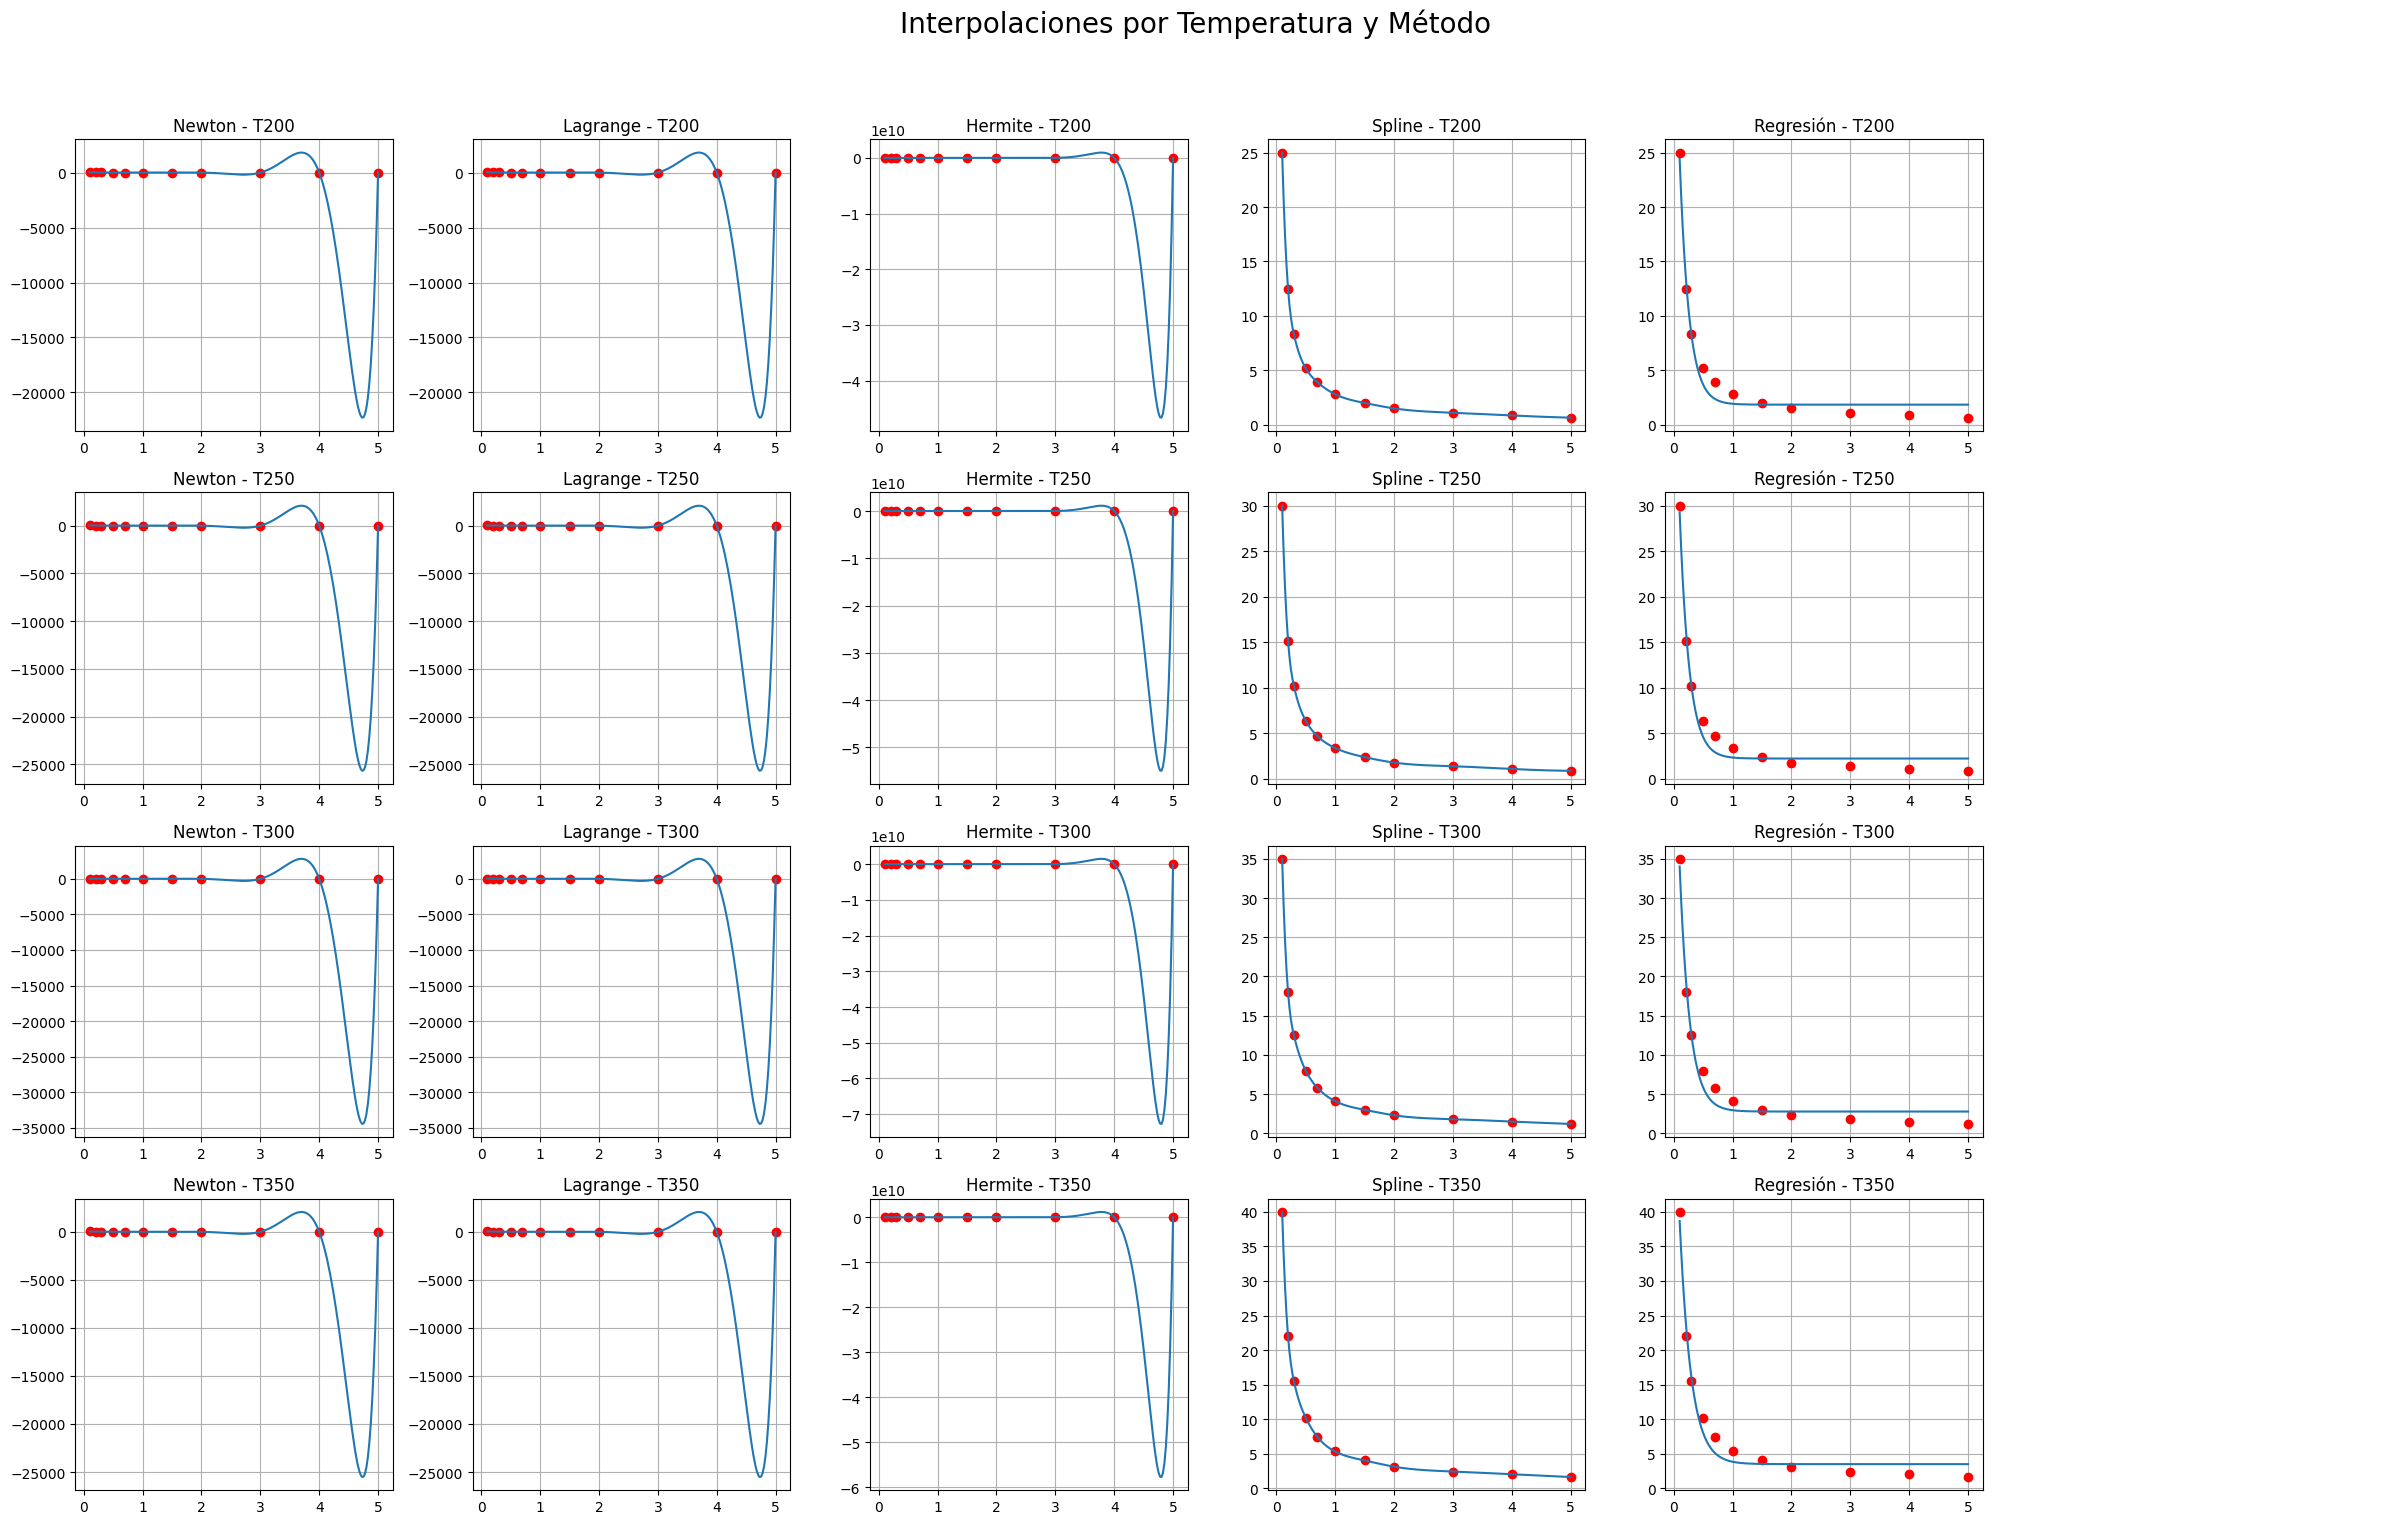

In [28]:
datos = {
    'T200': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [25.0,12.5,8.3,5.2,3.9,2.8,2.0,1.5,1.1,0.85,0.65]},
    'T250': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]},
    'T300': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [35.0,18.0,12.5,8.0,5.8,4.1,3.0,2.3,1.8,1.5,1.2]},
    'T350': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [40.0,22.0,15.5,10.2,7.4,5.3,4.0,3.1,2.4,2.0,1.6]},
}

derivadas_por_temperatura = {
    'T200': {0.2: -83.50000,0.3: -24.33333,0.5: -11.00000,0.7: -4.80000,1.0: -2.37500},
    'T250': {0.2: -99.00000,0.3: -29.33333,0.5: -13.75000,0.7: -6.00000,1.0: -2.87500},
    'T300': {0.2: -112.50000,0.3: -33.33333,0.5: -16.75000,0.7: -7.80000,1.0: -3.50000},
    'T350': {0.2: -122.50000,0.3: -39.33333,0.5: -20.25000,0.7: -9.80000,1.0: -4.25000}
}

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, lambdify
from scipy.interpolate import KroghInterpolator, CubicSpline
from scipy.optimize import curve_fit


temperaturas = ['T200', 'T250', 'T300', 'T350']
metodos = ['Newton', 'Lagrange', 'Hermite', 'Spline', 'Regresión', 'Otro']  # ajusta según los que quieras
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
fig.suptitle("Interpolaciones por Temperatura y Método", fontsize=20)

for i, temp in enumerate(temperaturas):
    x = datos[temp]['P']
    y = datos[temp]['V']

    for j, metodo in enumerate(metodos):
        ax = axs[i, j]
        try:
            if metodo == 'Newton':
                coef = diferencias_divididas(x, y)
                pol = construir_polinomio_simplificado(coef, x)
                f = lambdify(symbols('x'), pol, 'numpy')

            elif metodo == 'Lagrange':
                pol = lagrange_interpolation(x, y)[0]
                f = lambdify(symbols('x'), pol, 'numpy')

            elif metodo == 'Hermite':
                from scipy.interpolate import KroghInterpolator
                derivadas = derivadas_por_temperatura[temp]

                x_herm = []
                y_herm = []
                for xi, yi in zip(x, y):
                    x_herm.append(xi)
                    y_herm.append(yi)
                    if xi in derivadas:
                        x_herm.append(xi)           # repetir el punto
                        y_herm.append(derivadas[xi])  # usar derivada como segundo valor

                interpolador = KroghInterpolator(x_herm, y_herm)
                f = interpolador


                
            elif metodo == 'Spline':
                from scipy.interpolate import CubicSpline
                f = CubicSpline(x, y)

            elif metodo == 'Regresión':
                from scipy.optimize import curve_fit
                def modelo(xv, a, b, c, d):
                    return a * np.exp(-b * xv / d) + c
                popt, _ = curve_fit(modelo, x, y, p0=[1, 1, 1, 1])
                f = lambda xv: modelo(xv, *popt)

            else:
                ax.axis('off')
                continue

            x_plot = np.linspace(min(x), max(x), 200)
            y_plot = f(x_plot)

            ax.plot(x, y, 'ro')
            ax.plot(x_plot, y_plot)
            ax.set_title(f"{metodo} - {temp}")
            ax.grid(True)

        except Exception as e:
            ax.text(0.5, 0.5, 'Error', ha='center', va='center')
            ax.set_title(f"{metodo} - {temp}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

